<a href="https://colab.research.google.com/github/midacahvid/DSFP/blob/main/webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraris
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
#send a request uto website
url =  'https://en.wikipedia.org/wiki/HIV_adult_prevalence_rate'
send_req  = requests.get(url)
send_req

<Response [200]>

In [ ]:
# parse to beautiful soup
page = BeautifulSoup(send_req.content, 'html.parser')


In [ ]:
#selecting the table from the webpage
table = page.find_all('table')


In [ ]:
#slecting table from the webpage

table_rows = []
for table in table:
    rows = table.find_all('tr')
    for row in rows:
        table_rows.append(row)

In [ ]:
# filtering list from the webpage
contain_list = []
uncontain_list = []
for tr in table_rows:
    if tr.find('li'):
        contain_list.append(tr)
    else:
        uncontain_list.append(tr)

In [ ]:
# selcting the table headers
table_headers = []
for i in uncontain_list:
    if i.find('th'):
      rows = i.find_all('th')
      for row in rows:
        table_headers.append(row)
th_text = []
for tab in table_headers:
  text = tab.get_text()
  th_text.append(text.replace('\n', '').replace('[1]', '').replace('[3]', ''))
th_text


['Country/Region',
 'Adult prevalence  of HIV/AIDS',
 'Number of people  with HIV/AIDS',
 'Annual deaths  from HIV/AIDS',
 'Year of estimate']

In [ ]:
uncontain_list.remove(uncontain_list[0])

In [ ]:
# getting the countries from the table
countries =  []

for i in uncontain_list:
  rows = i.find_all('td')
  for row in rows:
    if row.find('a'):
      countries.append(row.get_text().replace('\xa0', '').replace('\n', ''))


In [ ]:
# cleaning the countries list
countries = [element for element in countries if not re.match(r'^\d', element)]


['Eswatini',
 'Lesotho',
 'Botswana',
 'Zimbabwe',
 'South Africa',
 'Namibia',
 'Zambia',
 'Mozambique',
 'Malawi',
 'Equatorial Guinea',
 'Tanzania',
 'Kenya',
 'Uganda',
 'Togo',
 'Cameroon',
 'Gabon',
 'Central African Republic',
 'Guinea-Bissau',
 'Congo, Republic of the',
 'Barbados',
 'Rwanda',
 "Côte d'Ivoire",
 'South Sudan',
 'Gambia, The',
 'Haiti',
 'Nigeria',
 'Belize',
 'Angola',
 'Ghana',
 'Bahamas, The',
 'Jamaica',
 'Saint Vincent and the Grenadines [9]',
 'Russian Federation[10]',
 'Liberia',
 'Sierra Leone',
 'Guinea',
 'Guyana',
 'Suriname',
 'Djibouti',
 'Burundi',
 'Chad',
 'Mali',
 'Trinidad and Tobago',
 'Thailand',
 'Ethiopia',
 'Ukraine',
 'Brazil',
 'Benin',
 'Dominican Republic',
 'Papua New Guinea',
 'Cabo Verde',
 'Panama',
 'Myanmar',
 'Burkina Faso',
 'Congo, Democratic Republic of',
 'Georgia',
 'Latvia',
 'Cambodia',
 'Venezuela',
 'Moldova',
 'Eritrea',
 'El Salvador',
 'Uruguay',
 'Mauritania',
 'Chile',
 'Guatemala',
 'Paraguay',
 'Portugal',
 'Nige

In [ ]:
len(countries)

187

In [ ]:
th_text

['Country/Region',
 'Adult prevalence  of HIV/AIDS',
 'Number of people  with HIV/AIDS',
 'Annual deaths  from HIV/AIDS',
 'Year of estimate']

In [ ]:
uncontain_list.remove(uncontain_list[0])

In [ ]:
# creating a dictionary to store the data
dict_list = {'Country/Region':[],
    'Adult prevalence of HIV/AIDS': [],
             'Number of people with HIV/AIDS': [],
             'Annual deaths from HIV/AIDS':[],
             'Year of estimate':[]}
for i in uncontain_list:
  rows = i.find_all('td')
  dict_list['Country/Region'].append(rows[0].get_text().replace('\xa0', '').replace('\n', ''))
  dict_list['Adult prevalence of HIV/AIDS'].append(rows[1].get_text().replace('\n', ''))
  dict_list['Number of people with HIV/AIDS'].append(rows[2].get_text().replace('\n', ''))
  dict_list['Annual deaths from HIV/AIDS'].append(rows[3].get_text().replace('\n', ''))
  dict_list['Year of estimate'].append(rows[4].get_text().replace('\n', ''))


In [ ]:
# converting to dataframe
df_hiv = pd.DataFrame(dict_list)

In [ ]:
# removing the brackets
df_hiv['Country/Region'] = df_hiv['Country/Region'].str.split('\[').str[0]
df_hiv['Adult prevalence of HIV/AIDS'] = df_hiv['Adult prevalence of HIV/AIDS'].str.split('\[').str[0]
df_hiv['Number of people with HIV/AIDS'] = df_hiv['Number of people with HIV/AIDS'].str.split('\[').str[0]
df_hiv['Annual deaths from HIV/AIDS'] = df_hiv['Annual deaths from HIV/AIDS'].str.split('\[').str[0]
df_hiv['Year of estimate'] = df_hiv['Year of estimate'].str.split('\[').str[0]

In [ ]:
# removing the commas
df_hiv['Number of people with HIV/AIDS'] = df_hiv['Number of people with HIV/AIDS'].str.replace(',', '')
df_hiv['Annual deaths from HIV/AIDS'] = df_hiv['Annual deaths from HIV/AIDS'].str.replace(',', '')



In [ ]:
# removing the dash
df_hiv['Adult prevalence of HIV/AIDS'] = df_hiv['Adult prevalence of HIV/AIDS'].str.replace('-', '0')
df_hiv['Number of people with HIV/AIDS'] = df_hiv['Number of people with HIV/AIDS'].str.replace('-', '0')
df_hiv['Annual deaths from HIV/AIDS'] = df_hiv['Annual deaths from HIV/AIDS'].str.replace('-', '0')

In [ ]:
# removing the percent sign
df_hiv['Adult prevalence of HIV/AIDS'] = df_hiv['Adult prevalence of HIV/AIDS'].str.replace('%', '')

In [ ]:
# removing the space
df_hiv['Number of people with HIV/AIDS'] = df_hiv['Number of people with HIV/AIDS'].str.replace(' ', '')

In [ ]:
# converting to required type

df_hiv['Adult prevalence of HIV/AIDS'] = df_hiv['Adult prevalence of HIV/AIDS'].astype(float)
df_hiv['Number of people with HIV/AIDS'] = df_hiv['Number of people with HIV/AIDS'].astype(int)
df_hiv['Annual deaths from HIV/AIDS'] = df_hiv['Annual deaths from HIV/AIDS'].astype(int)
df_hiv['Year of estimate'] = pd.to_datetime(df_hiv['Year of estimate'], format='%Y', errors='coerce').dt.year

In [ ]:
df_hiv['Year of estimate'].unique()

array([2024, 2023, 2016, 2018, 2019, 2022, 2013, 2021], dtype=int32)

In [ ]:
df_hiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country/Region                  187 non-null    object 
 1   Adult prevalence of HIV/AIDS    187 non-null    float64
 2   Number of people with HIV/AIDS  187 non-null    int64  
 3   Annual deaths from HIV/AIDS     187 non-null    int64  
 4   Year of estimate                187 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 6.7+ KB


In [ ]:
averages_df = df_hiv.groupby('Year of estimate')['Annual deaths from HIV/AIDS'].mean()

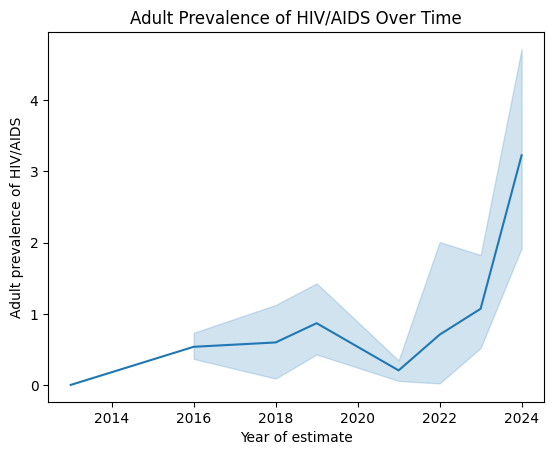

In [ ]:

# Adult Prevalence of HIV/AIDS Over Time
sns.lineplot(data=df_hiv, x='Year of estimate', y='Adult prevalence of HIV/AIDS')
plt.title('Adult Prevalence of HIV/AIDS Over Time')
plt.show()

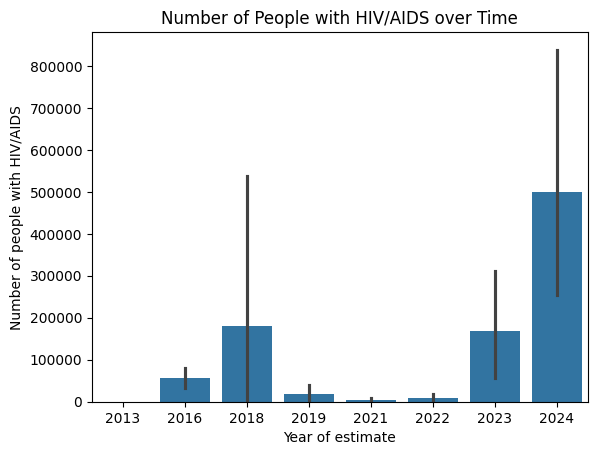

In [ ]:
sns.barplot(data=df_hiv, x='Year of estimate', y='Number of people with HIV/AIDS')
plt.title('Number of People with HIV/AIDS over Time')
plt.show()

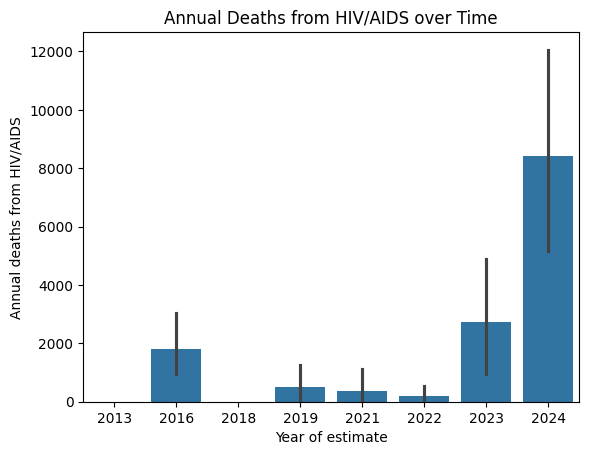

In [ ]:
# Annual Deaths from HIV/AIDS over Time
sns.barplot(data=df_hiv, x='Year of estimate', y='Annual deaths from HIV/AIDS')
plt.title('Annual Deaths from HIV/AIDS over Time')
plt.show()

In [ ]:
top_10_prev = df_hiv.groupby(['Country/Region', 'Year of estimate'])['Adult prevalence of HIV/AIDS'].mean().sort_values(ascending=False).head(10)

In [ ]:
df_top10prev =  pd.DataFrame(top_10_prev)

In [ ]:
df_top10prev.reset_index(inplace=True)

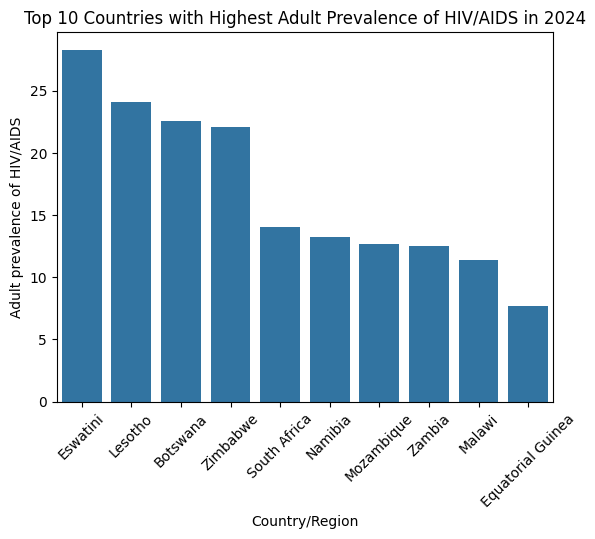

In [ ]:
# Top 10 Countries with Highest Adult Prevalence of HIV/AIDS in 2024
sns.barplot(data=df_top10prev, x='Country/Region', y='Adult prevalence of HIV/AIDS')
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Highest Adult Prevalence of HIV/AIDS in 2024')
plt.show()
